<a href="https://colab.research.google.com/github/jeremysb1/xgboost/blob/main/AB_NYC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

excluding_list = ['price', 'id', 'latitude', 'longitude', 'host_id', 'last_review', 'name', 'host_name']
categorical = ['neighbourhood_group', 'neighbourhood', 'room_type']
continuous = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count']

data = pd.read_csv("/content/drive/MyDrive/XGBoost/AB_NYC_2019.csv")

In [2]:
data.shape

(48895, 16)

In [3]:
data[categorical].nunique()

neighbourhood_group      5
neighbourhood          221
room_type                3
dtype: int64

Separating the low from the high cardinality categorical features and process only the low cardinality ones:

In [4]:
low_card_categorical = ['neighbourhood_group', 'room_type']
high_card_categorical = ['neighbourhood']

The following command asks to flag true missing values and then computes a count of them across features:

In [5]:
data[low_card_categorical + continuous].isna().sum()

neighbourhood_group                   0
room_type                             0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
dtype: int64

In [6]:
data.reviews_per_month.min()

0.01

A histogram describing how the Price feature is distributed:

array([[<Axes: title={'center': 'price'}>]], dtype=object)

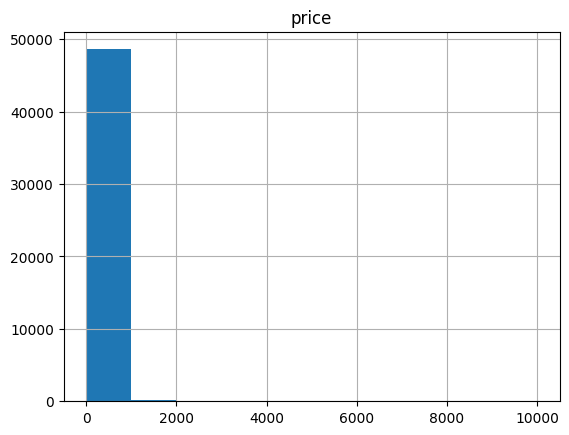

In [7]:
data[["price"]].hist(bins=10)